In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(mouse_metadata)

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows=mouse_data.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicate_mice=mouse_data[duplicate_rows]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=mouse_data[~mouse_data["Mouse ID"].isin(duplicate_mice)]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

248

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = clean_mouse_data.groupby('Drug Regimen')

mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var(ddof=0)
std_dev = grouped_data['Tumor Volume (mm3)'].std(ddof=0)
sem = grouped_data['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Std. Dev.': std_dev,
    'SEM': sem
})
summary_stats

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

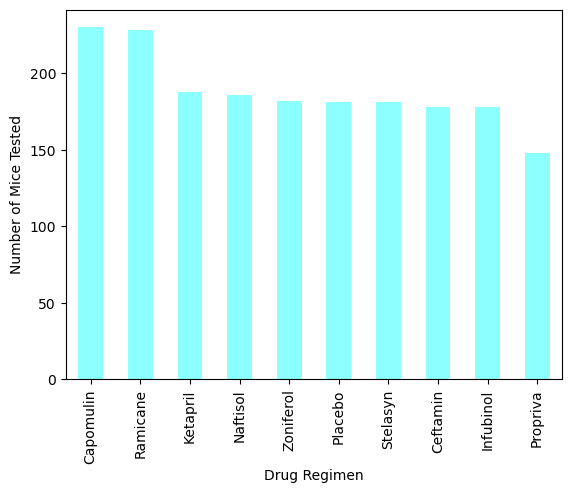

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_mouse_data.groupby('Drug Regimen')["Timepoint"].count()
mice_count = mice_count.sort_values(ascending=False)
ax = mice_count.plot(kind='bar', color='cyan', alpha=0.45)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')
plt.show()


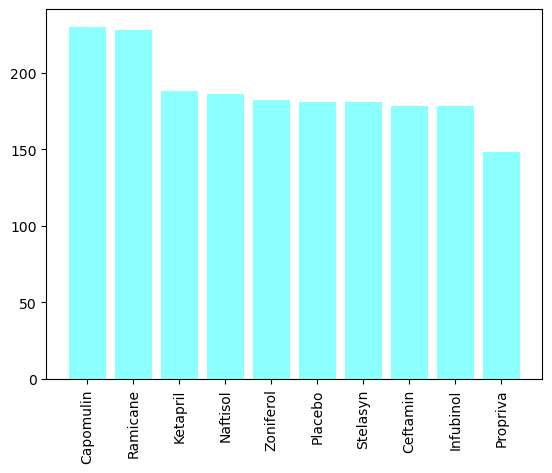

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_count = mice_count.sort_values(ascending=False)
plt.bar(mice_count.index, mice_count.values, color="cyan", alpha=0.45)
plt.xticks(rotation=90)

plt.show()

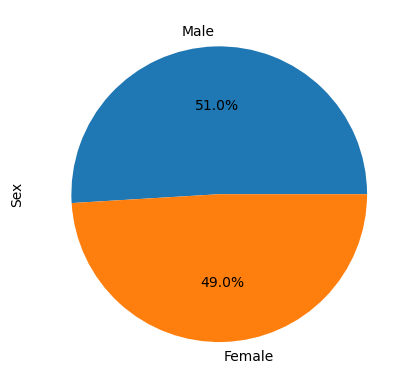

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_mouse_data["Sex"].value_counts()
counts.plot(kind="pie", labels=["Male", "Female"], autopct='%1.1f%%')
plt.show()

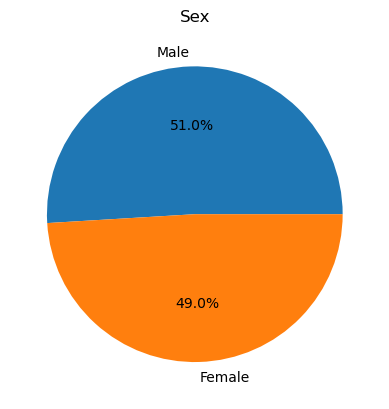

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title("Sex")
plt.show()

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
mouse_data_filtered = clean_mouse_data[clean_mouse_data["Drug Regimen"].isin(treatments)]
last_timepoint = mouse_data_filtered.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, mouse_data_filtered, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset=final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


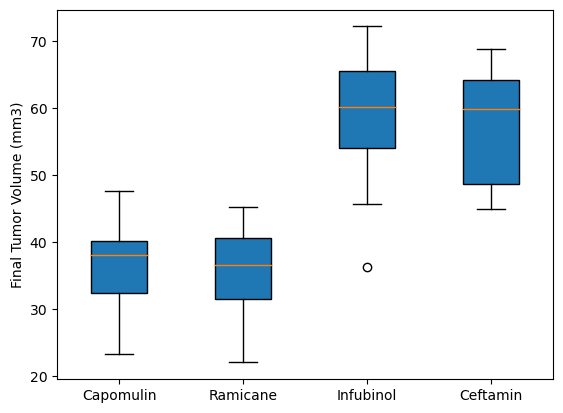

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, vert=True, patch_artist=True, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

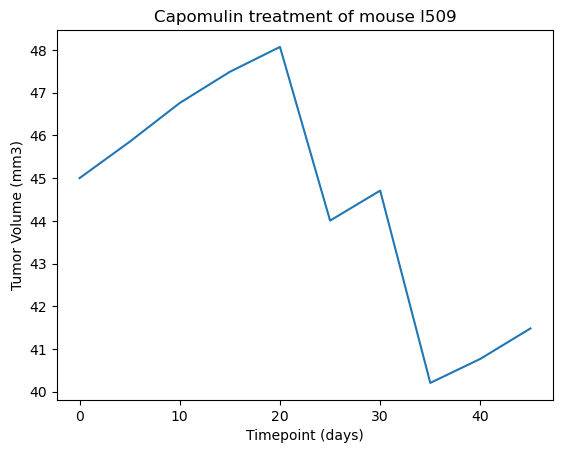

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_data_filtered.loc[mouse_data_filtered["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin.loc[capomulin["Mouse ID"] == "l509"]
x_value = capomulin_data["Timepoint"]
y_value = capomulin_data["Tumor Volume (mm3)"]
plt.plot(x_value, y_value)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

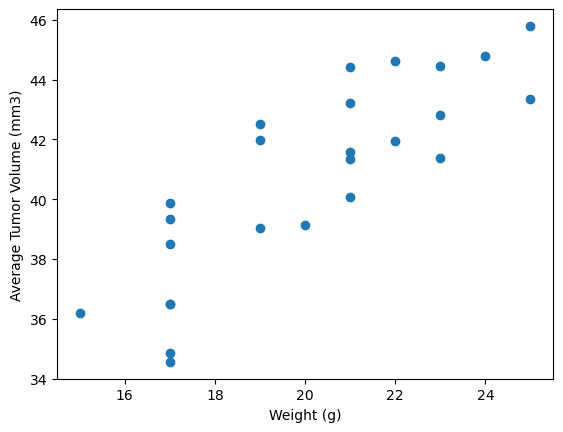

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_data_filtered[mouse_data_filtered["Drug Regimen"] == "Capomulin"]
capomulin_grouped = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)" : "mean", "Weight (g)" : "mean"})
x_val=capomulin_grouped["Weight (g)"]
y_val=capomulin_grouped["Tumor Volume (mm3)"]
plt.scatter(x_val, y_val)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is  0.84


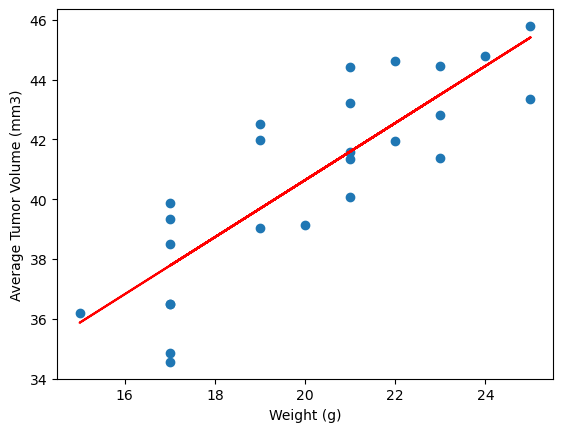

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = capomulin_grouped.corr().iloc[0,1]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {corr_coef: .2f}")
plt.show()